In [12]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Correlations in AR models
An autoregressive model of order p is defined as
yt = c + phi1 yt−1 + phi2 yt−2 + ... + phi_p yt−p + ϵt,

Write a function that calculates the values of AR(p) model. The function must have a parameter burnin that
determines how many initial values are discarded.

In [21]:
def ar_model(p, ar_coeffs, c, n_samples, burnin=10):
    et = np.random.normal(size=n_samples)
    ar_values = np.zeros_like(et, dtype=float)
    for t in range(p, n_samples):
        ar_values[t] = c + np.sum(ar_coeffs[::-1] * ar_values[t-p:t]) + et[t]
    return ar_values[burnin:]

Calculate n = 5000 values of the AR(1) model yt = 18 − 0.6yt−1 + ϵt.

In [97]:
order = 1
coefficients = [-0.6]
num_samples = 5000
c = 18

In [98]:
ar_values = ar_model(order, coefficients, c, num_samples, burnin=70)

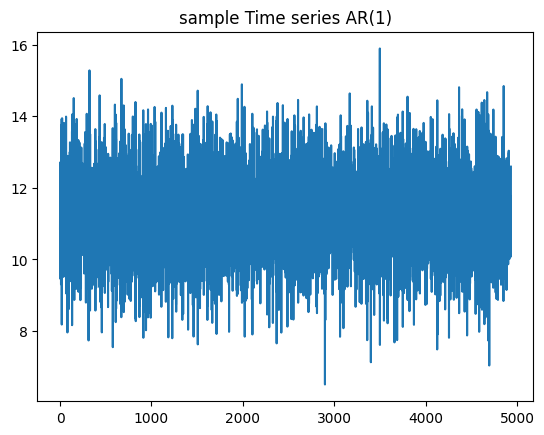

In [99]:
plt.plot(ar_values)
plt.title("sample Time series AR(1)")
plt.show()

• Calculate the autocorrelation (ACF) and partial autocorrelation (PACF) function for this time series.

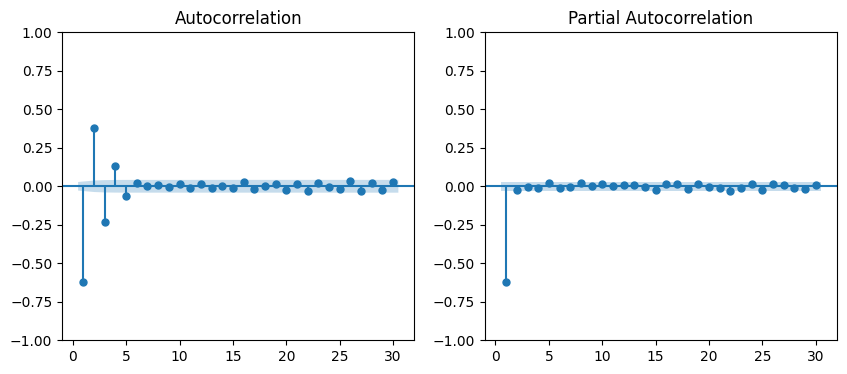

In [100]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plot_acf(ar_values, lags=30, zero=False, ax=axs[0])
plot_pacf(ar_values, lags=30, zero=False, ax=axs[1])
plt.show()

• Repeat the calculations for phi_1 = −0.7, −0.8, −0.9.

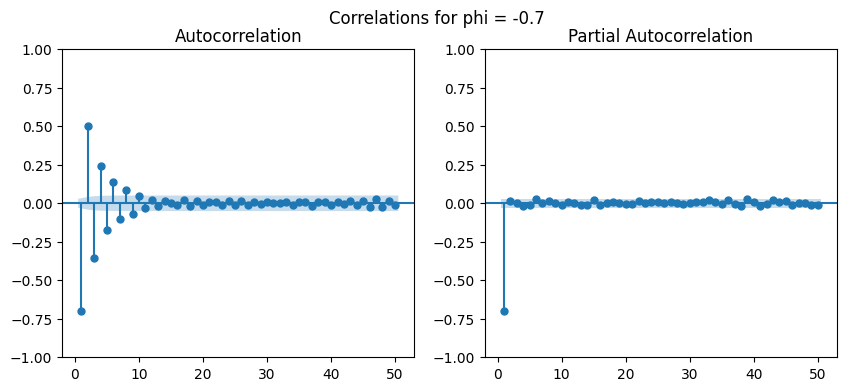

In [101]:
order = 1
coefficients = [-0.7]
num_samples = 5000
c = 18
ar_values = ar_model(order, coefficients, c, num_samples, burnin=500)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.suptitle("Correlations for phi = -0.7")
plot_acf(ar_values, lags=50, zero=False, ax=axs[0])
plot_pacf(ar_values, lags=50, zero=False, ax=axs[1])
plt.show()

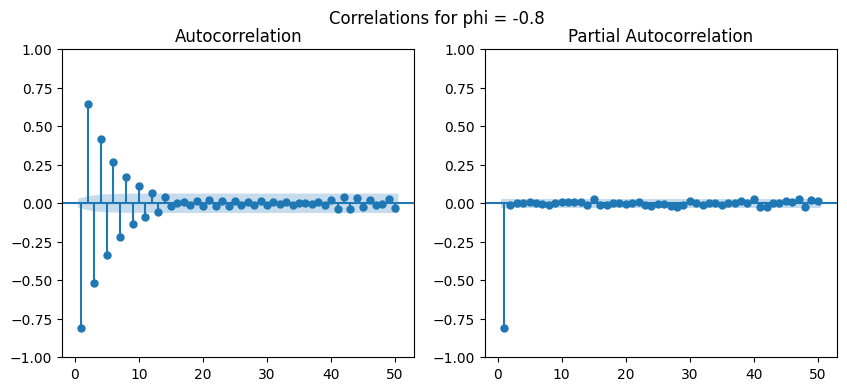

In [102]:
order = 1
coefficients = [-0.8]
num_samples = 5000
c = 18
ar_values = ar_model(order, coefficients, c, num_samples, burnin=500)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.suptitle("Correlations for phi = -0.8")
plot_acf(ar_values, lags=50, zero=False, ax=axs[0])
plot_pacf(ar_values, lags=50, zero=False, ax=axs[1])
plt.show()

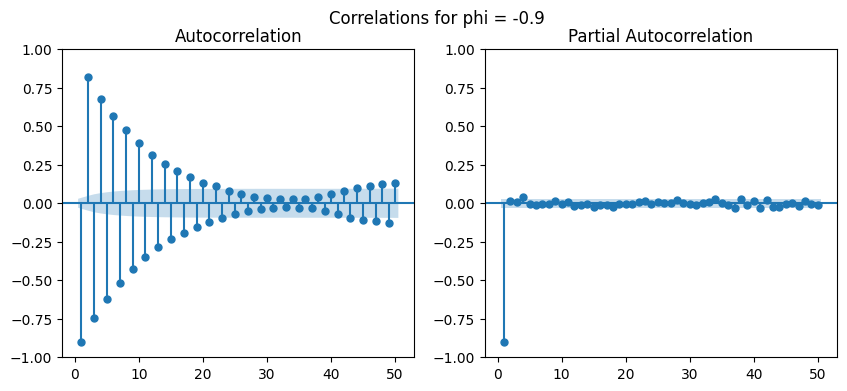

In [103]:
order = 1
coefficients = [-0.9]
num_samples = 5000
c = 18
ar_values = ar_model(order, coefficients, c, num_samples, burnin=500)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.suptitle("Correlations for phi = -0.9")
plot_acf(ar_values, lags=50, zero=False, ax=axs[0])
plot_pacf(ar_values, lags=50, zero=False, ax=axs[1])
plt.show()


 What happens when |ϕ1| > 1

In [ ]:
order = 1
coefficients = [-1.9]
num_samples = 5000
c = 18
ar_values = ar_model(order, coefficients, c, num_samples, burnin=500)
ar_values

<ipython-input-125-25dd3f363950>:4: RuntimeWarning: overflow encountered in multiply
  ar_values[t] = c + np.sum(ar_coeffs[::-1] * ar_values[t-p:t]) + np.random.normal()


array([-1.27835765e+140,  2.42887954e+140, -4.61487112e+140, ...,
                    inf,             -inf,              inf])

If we set |phi| > 1 , our time series goes to infinity

# AR(2)

Calculate n = 5000 values of the AR(2) model yt = 8 + 1.3yt−1 − 0.7yt−2 + ϵt. Compare the structure of
PACFs for AR(1) and AR(2) models.

In [104]:
order = 2
coefficients = [1.3, -0.7]
num_samples = 5000
c = 8
ar_values = ar_model(order, coefficients, c, num_samples, burnin=500)

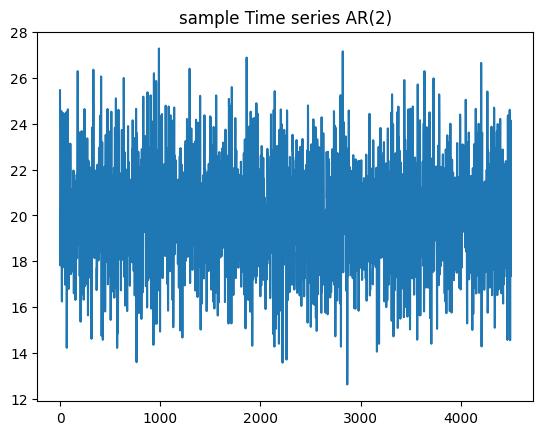

In [105]:
plt.plot(ar_values)
plt.title("sample Time series AR(2)")
plt.show()

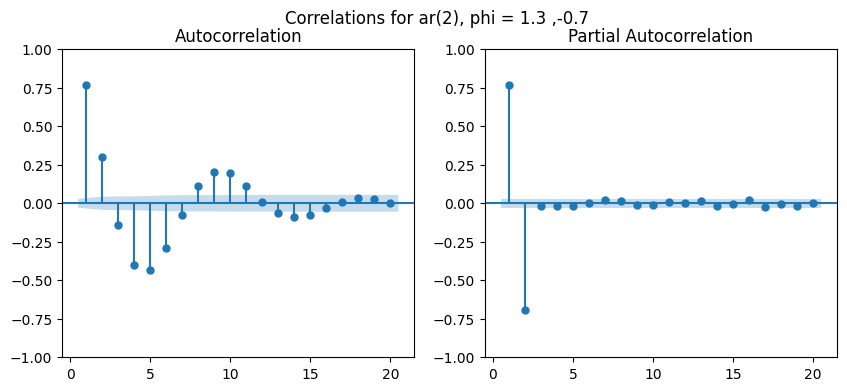

In [106]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.suptitle("Correlations for ar(2), phi = 1.3 ,-0.7")
plot_acf(ar_values, lags=20, zero=False, ax=axs[0])
plot_pacf(ar_values, lags=20, zero=False, ax=axs[1])
plt.show()

For an AR(1) model, the PACF will have a sharp drop after lag 1 because it directly measures the correlation between a variable and its lagged values, and after the first lag, all other lags are indirectly related through the first lag. So, the PACF will be significant at lag 1 and then drop to approximately zero for all other lags.

For an AR(2) model, the PACF will be significant at lags 1 and 2 because the variable is directly related to its first and second lagged values

# MOVING AVERAGES



In [107]:
def ma_model(q, ma_coeffs, c, n_samples, burnin=10):
    ma_values = np.zeros(n_samples)
    et_values = np.random.normal(size=n_samples)
    for t in range(q, n_samples):
        ma_values[t] = c + np.dot(ma_coeffs[::-1], et_values[t-q:t]) + et_values[t]
    return ma_values[burnin:]

In [108]:
q = 1
coefficients = [0.8]
num_samples = 5000
c = 20
ma_values = ma_model(q, coefficients, c, num_samples, burnin=100)

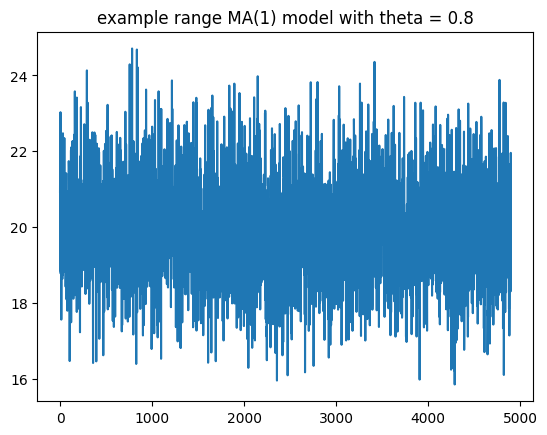

In [109]:
plt.plot(ma_values)
plt.title("example range MA(1) model with theta = 0.8")
plt.show()

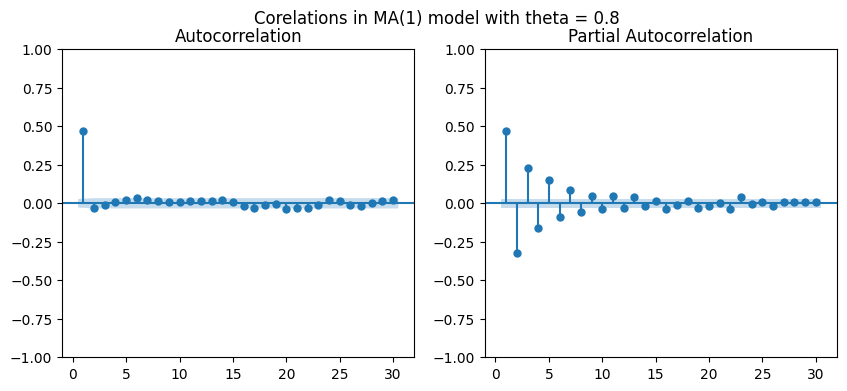

In [111]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.suptitle("Corelations in MA(1) model with theta = 0.8")
plot_acf(ma_values, lags=30, zero=False, ax=axs[0])
plot_pacf(ma_values, lags=30, zero=False, ax=axs[1])
plt.show()

In [112]:
q = 2
coefficients = [-1, 0.8]
num_samples = 5000
c = 0
ma_values = ma_model(q, coefficients, c, num_samples, burnin=100)

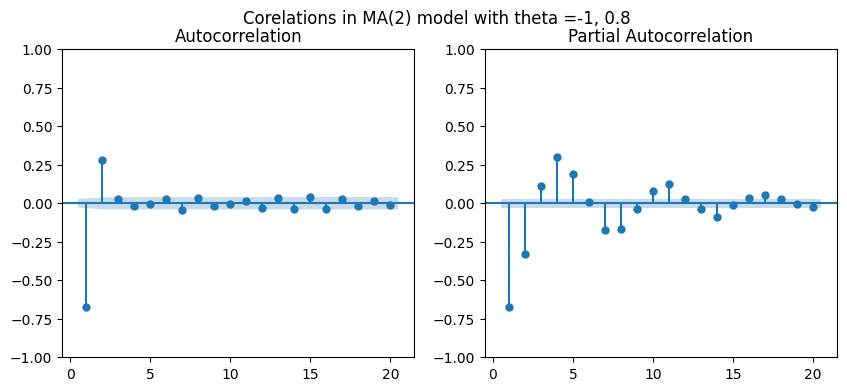

In [113]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.suptitle("Corelations in MA(2) model with theta =-1, 0.8")
plot_acf(ma_values, lags=20, zero=False, ax=axs[0])
plot_pacf(ma_values, lags=20, zero=False, ax=axs[1])
plt.show()

In acf :


1.   for AR model : Slowly decaying. It will show significant autocorrelation values for several lags.

2.  for MA Model : Sharp drop after the lag corresponding to the order of the MA model. All subsequent lags should be approximately zero.

in Pacf :

1.   for AR model : Sharp drop after the lag corresponding to the order of the AR model. All subsequent lags should be approximately zero
2.   for MA model : Slowly decaying. It will show significant partial autocorrelation values for several lags.





# AR(p)  model fitting


In [60]:
order = 2
coefficients = [1.3, -0.7]
num_samples = 5000
c = 8
ar2_values = ar_model(order, coefficients, c, num_samples, burnin=20)

In [61]:
from statsmodels.tsa.arima.model import ARIMA
aic_values= []
models = []
p_values = [1, 2, 3, 4]
for p in p_values:
    model = ARIMA(ar2_values, order=(p, 0, 0))
    model_fit = model.fit()
    models.append(model_fit)
    estimated_params = model_fit.params
    print(f"\n------------------Model AR({p})------------------\n")
    print(model_fit.summary())
    aic_values.append(model_fit.aic)



------------------Model AR(1)------------------

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4980
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -8735.110
Date:                Wed, 17 Apr 2024   AIC                          17476.219
Time:                        15:45:29   BIC                          17495.759
Sample:                             0   HQIC                         17483.069
                               - 4980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0188      0.086    233.468      0.000      19.851      20.187
ar.L1          0.7691      0.009     84.789      0.000       0.751       0.787
si

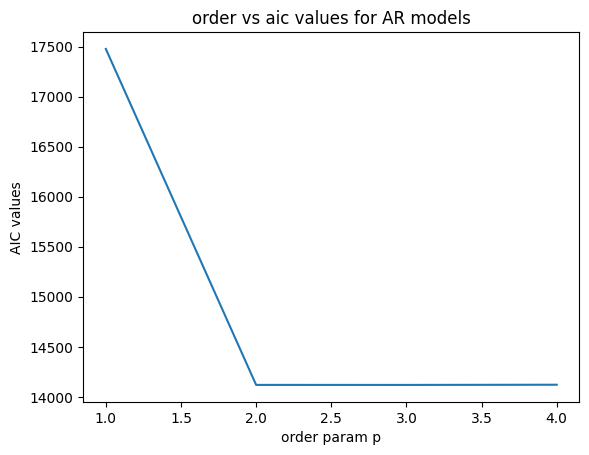

In [62]:
plt.plot(p_values, aic_values)
plt.xlabel("order param p")
plt.ylabel("AIC values")
plt.title("order vs aic values for AR models")
plt.show()

since the aic values of ar(2), ar(3) and ar(4) are very close. we can do llr test to determine the better one

In [58]:
from scipy.stats.distributions import chi2

In [73]:
def LLR_test(m1,m2,DF=1):
 L1=m1.llf
 L2=m2.llf
 LR=2*(L2-L1)
 p=chi2.sf(LR,DF).round(3)
 return p

in or models list,


1.   model[0] is ar(1),
2.    model[1] is ar(2)
3.    model[2] is ar(3) and
4.    model[3] is ar(4)

In [96]:
LLR_test(models[2], models[1])

1.0

since p_values > 0.05 , we cant say that ar(2) is much better than ar(1)

In [75]:
LLR_test(models[2], models[3])

0.801

# **MA(q) Fitting**

we fit MA(2) time series to our model

In [69]:
q = 2
coefficients = [-1, 0.8]
num_samples = 5000
c = 0
ma_values = ma_model(q, coefficients, c, num_samples, burnin=100)

In [76]:
from statsmodels.tsa.arima.model import ARIMA
aic_values= []
models = []
q_values = [1, 2, 3, 4]
for q in q_values:
    model = ARIMA(ma_values, order=(0, 0, q))
    model_fit = model.fit()
    models.append(model_fit)
    estimated_params = model_fit.params
    print(f"\n------------------Model MA({q})------------------\n")
    print(model_fit.summary())
    aic_values.append(model_fit.aic)


------------------Model MA(1)------------------

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4900
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -8114.474
Date:                Wed, 17 Apr 2024   AIC                          16234.947
Time:                        16:05:31   BIC                          16254.438
Sample:                             0   HQIC                         16241.785
                               - 4900                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0090      0.008      1.144      0.253      -0.006       0.024
ma.L1         -0.5681      0.012    -49.322      0.000      -0.591      -0.546
si

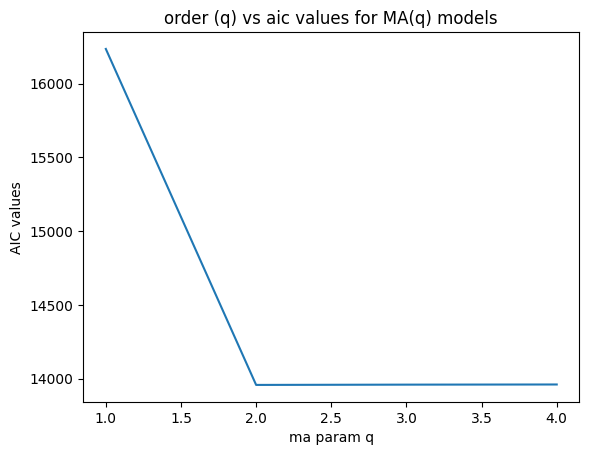

In [72]:
plt.plot(q_values, aic_values)
plt.xlabel("ma param q")
plt.ylabel("AIC values")
plt.title("order (q) vs aic values for MA(q) models")
plt.show()

In [82]:
LLR_test(models[0], models[1])

0.0

MA(2) is better than MA(1) p =0

In [84]:
LLR_test(models[1], models[2])

0.78

THE AIC value of model[1] that is MA(2) is slighlty lower than MA(3) and MA(4).But we cannot certainly say that MA(2) is definitely better than MA(3)

---



